In [1]:
!mkdir data
!wget https://www.dropbox.com/s/pvhrql9mbczz69y/iris.csv?dl=0 -O data/iris.csv

--2023-04-18 07:00:26--  https://www.dropbox.com/s/pvhrql9mbczz69y/iris.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/pvhrql9mbczz69y/iris.csv [following]
--2023-04-18 07:00:27--  https://www.dropbox.com/s/raw/pvhrql9mbczz69y/iris.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc93f3842ce8737681b9c9d4d002.dl.dropboxusercontent.com/cd/0/inline/B6ZaNjtnzlzozWeHG3qJ4ICsCmaYwOy2PTza-0fe2Thjz5gPUT-MuHhFfhRArRla_2YZfzDtzFaF8_ES5yThyUPQCQPqYpYunA_3QnF1R_N9mpIUPOxTc9kug9eHrNXFUjYi0tlpfdGFqF2lqUtPUzOq7d0e5REfJO-T-DOi9VEyGg/file# [following]
--2023-04-18 07:00:27--  https://uc93f3842ce8737681b9c9d4d002.dl.dropboxusercontent.com/cd/0/inline/B6ZaNjtnzlzozWeHG3qJ4ICsCmaYwOy2PTza-0fe2Thjz5gPUT-MuHhFfhRArRla_2YZfzDtzFaF8_ES5yTh

# Visualizig Tables: Iris

![](images/iris.png)

First import pandas, seaborn and pyplot: 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')
sns.set(font_scale=1.5)

<ipython-input-2-0e754146b777>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


Read the dataset:

In [17]:
data = pd.read_csv('data/iris.csv')# import dataset

data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## Explore the dataset

Let's use [scatter()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) function to see the distribution of the quantitative attributes.

Starting with two attributes:

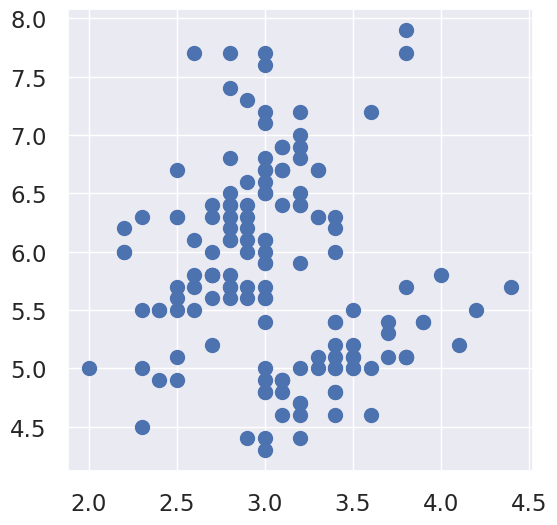

In [23]:
plt.rcParams['figure.figsize'] = [6, 6] #set size of the figures
plt.scatter(x=data['sepal_width'],
            y=data['sepal_length'], s=100) 
# scatter of two attributes

We encode a third attribute with size channel:

Text(0.5, 0, 'Sepal Width')

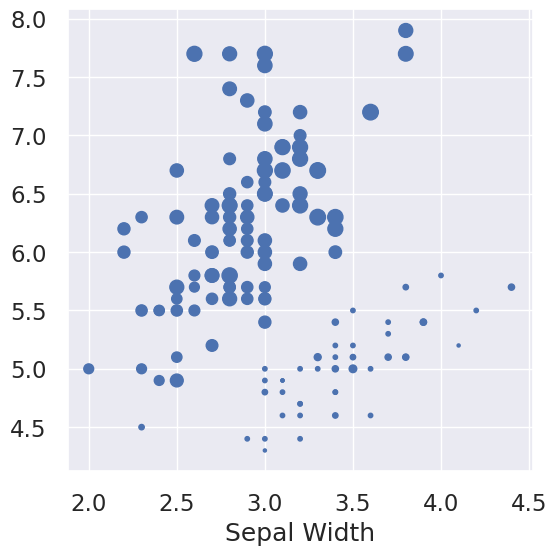

In [29]:
plt.scatter(x=data['sepal_width'], 
            y=data['sepal_length'], 
            s=data['petal_width']*50)
plt.xlabel('Sepal Width')

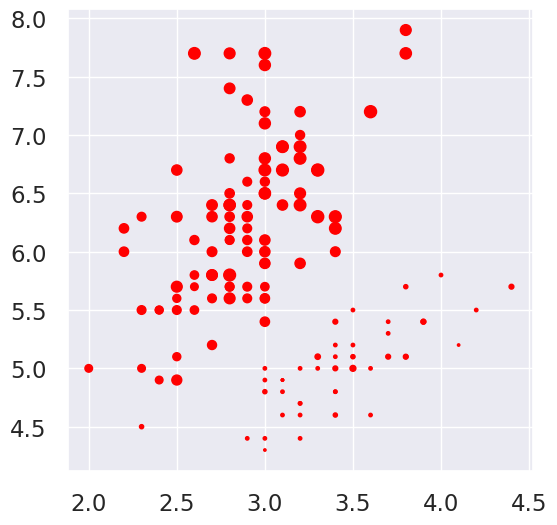

In [30]:
plt.scatter(x=data['sepal_width'], y=data['sepal_length'], s=data['petal_width']*30, c='red') #change scale for size

Finally, encode the 4th attribute with color:

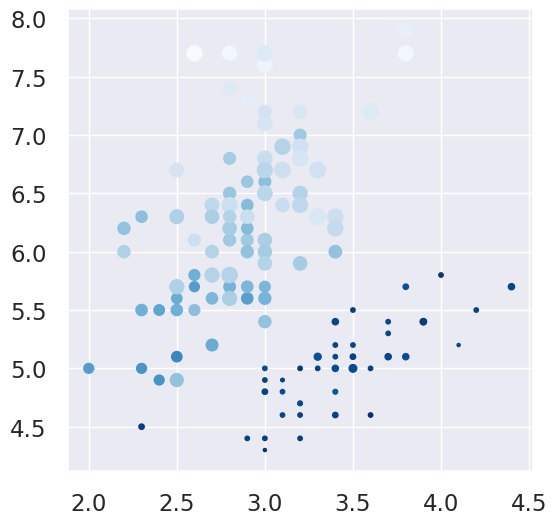

In [33]:
mycmap = plt.get_cmap('Blues_r')
plt.scatter(x=data['sepal_width'], 
            y=data['sepal_length'], 
            s=data['petal_width']*50, 
            c=data['petal_length'], cmap=mycmap) 

Text(0, 0.5, 'Sepal Length')

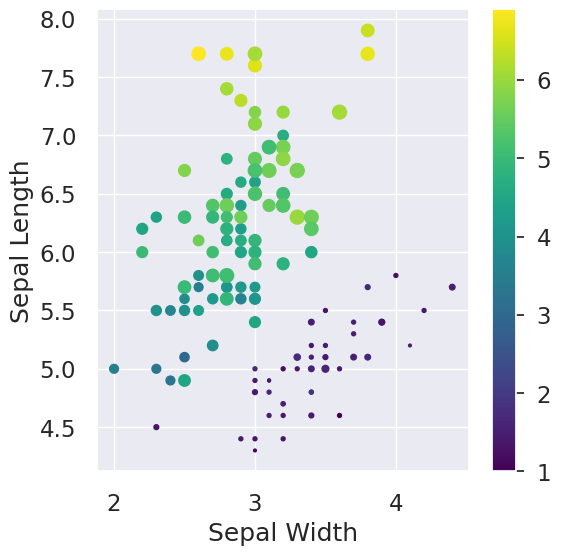

In [35]:
mycmap = plt.get_cmap('viridis') #use a better colormap to improve readability
plt.scatter(x=data['sepal_width'], y=data['sepal_length'], 
            s=data['petal_width']*40, c=data['petal_length'], cmap=mycmap) 
plt.colorbar()
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')

However, size is not accurate and color interacts with size: the result is poor.

With hundreds of points and 4 quantitative attributes we need a scatter 
plot matrix using [seaborn.pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot) 

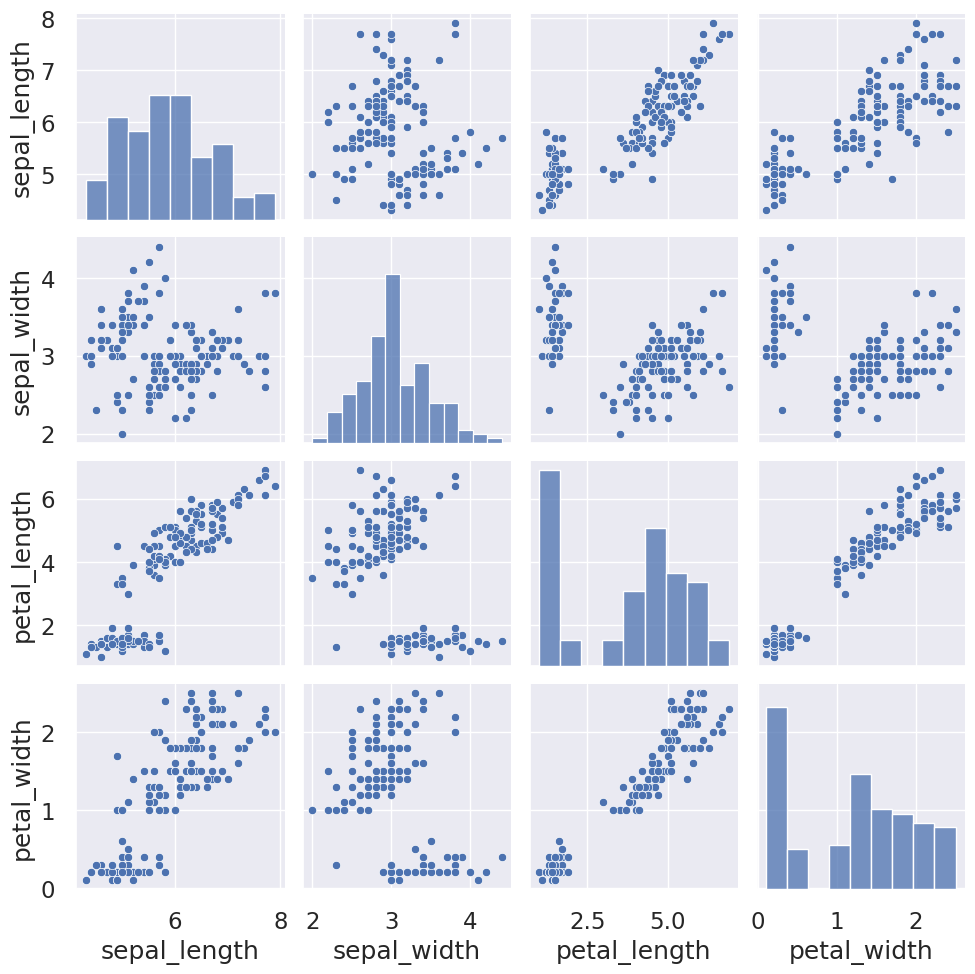

In [9]:
sns.pairplot(data)

Now we can also use color to encode species:

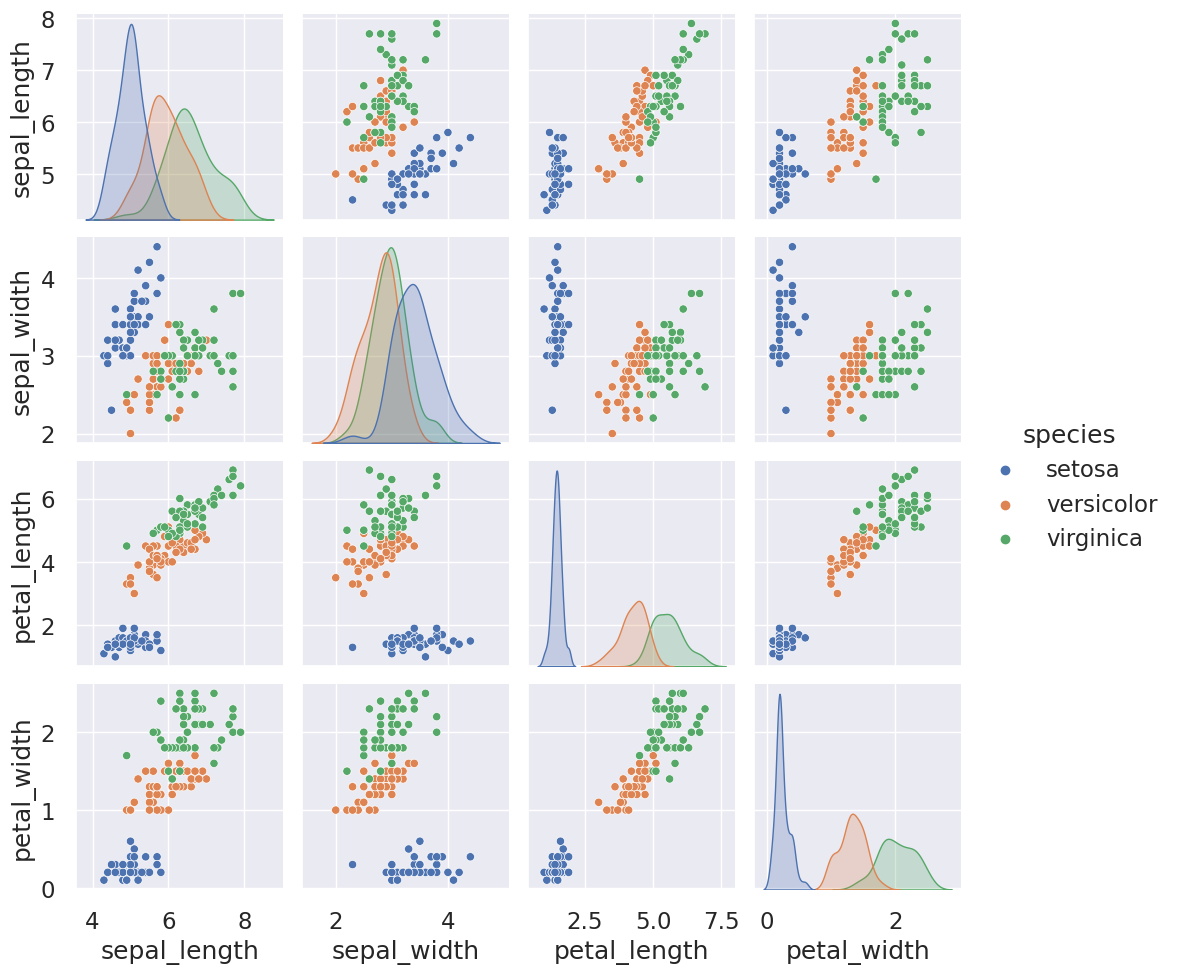

In [36]:
sns.pairplot(data, hue='species')

Now remove repeated plots:

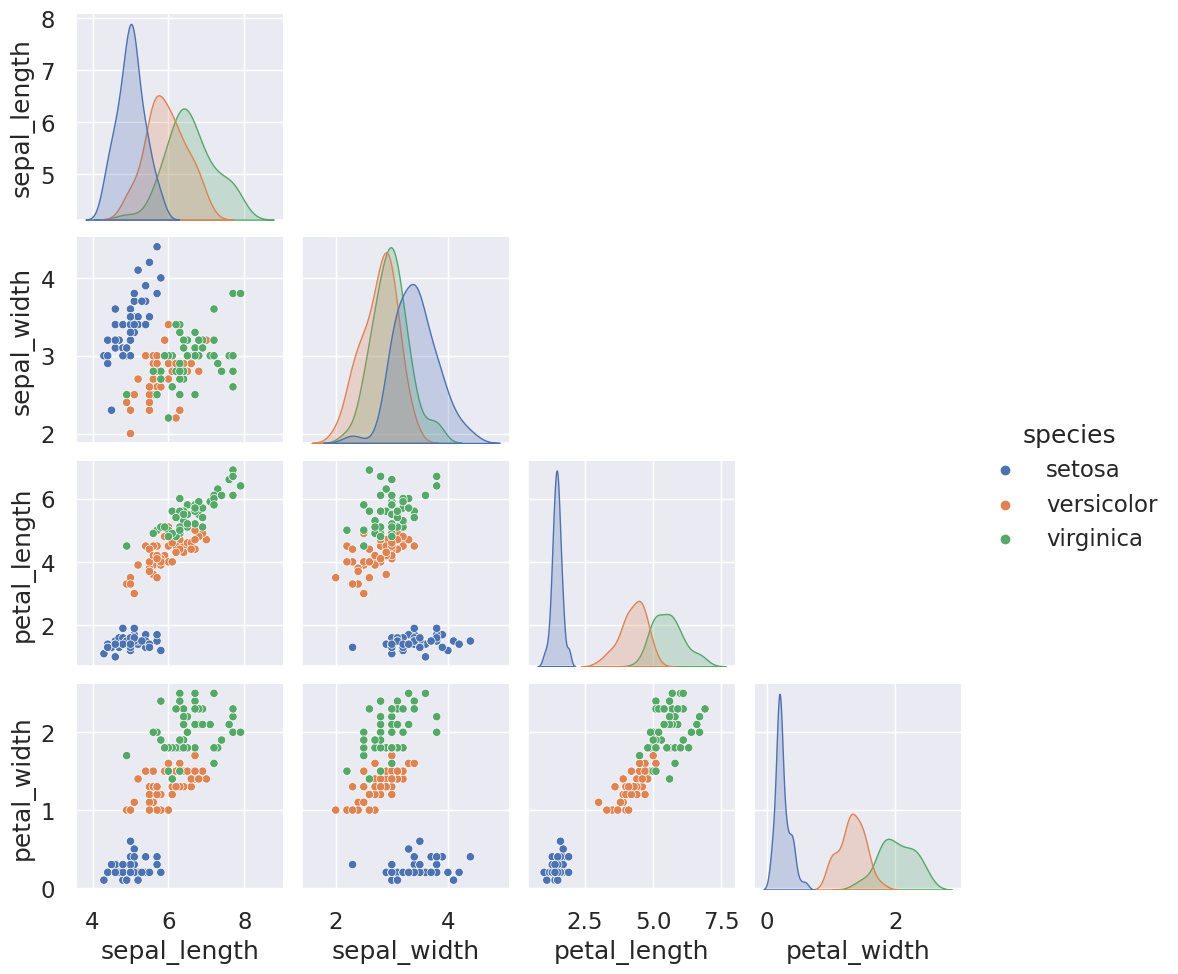

In [11]:
g = sns.pairplot(data, hue='species')
g.axes[0,1].set_visible(False)
g.axes[0,2].set_visible(False)
g.axes[0,3].set_visible(False)
g.axes[1,2].set_visible(False)
g.axes[1,3].set_visible(False)
g.axes[2,3].set_visible(False)

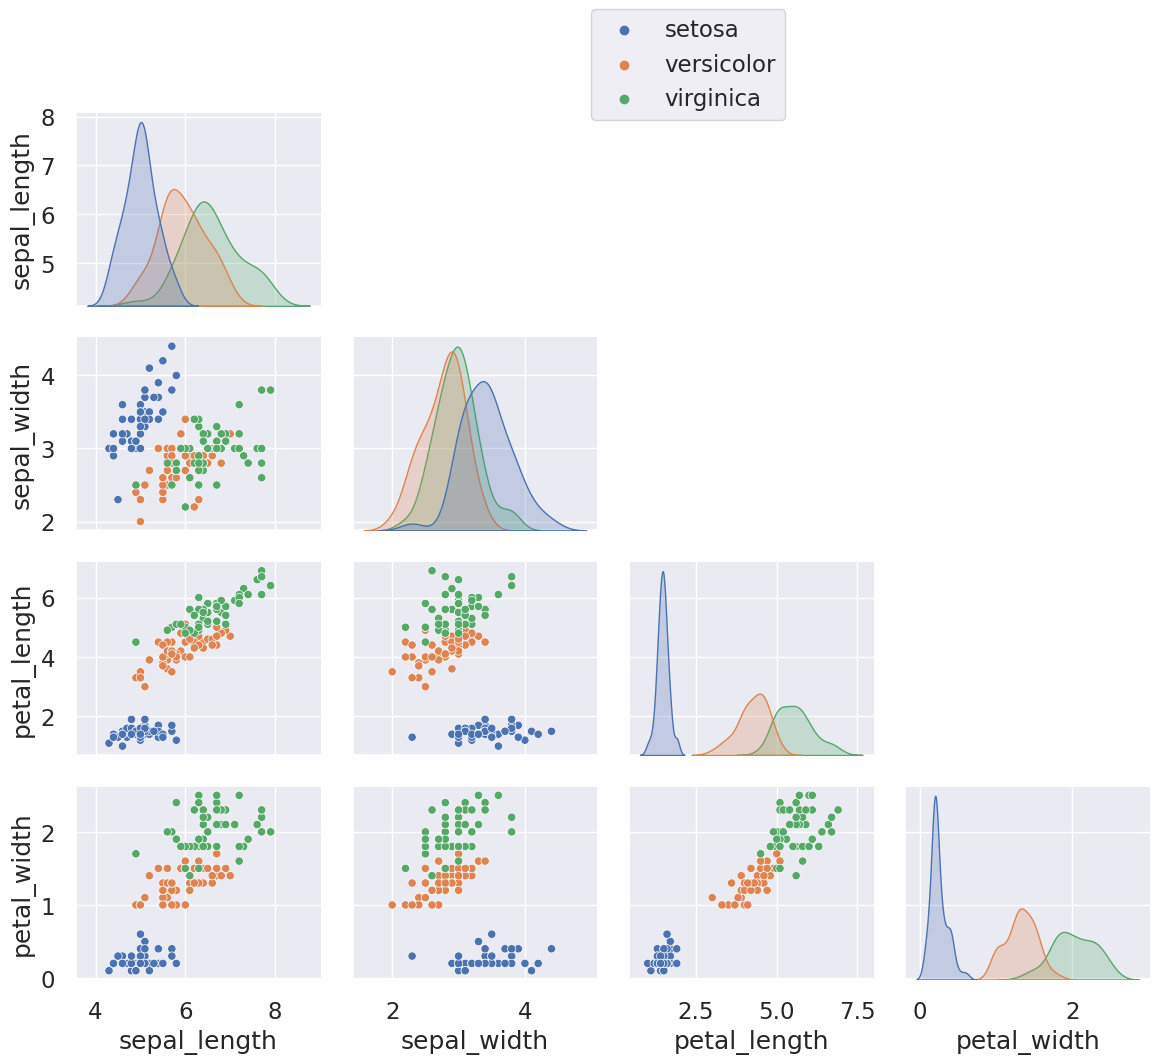

In [12]:
g = sns.pairplot(data, hue='species')
g.axes[0,1].set_visible(False)
g.axes[0,2].set_visible(False)
g.axes[0,3].set_visible(False)
g.axes[1,2].set_visible(False)
g.axes[1,3].set_visible(False)
g.axes[2,3].set_visible(False)
g._legend.remove()
plt.tight_layout()
g.axes[1,0].legend(bbox_to_anchor=(.5,.95), bbox_transform = g.fig.transFigure, loc=3)



## Correlation between attributes

Analysis of attribute correlations using [parallel_coordinates()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.plotting.parallel_coordinates.html#pandas.plotting.parallel_coordinates)

<ipython-input-13-8acef4c755a3>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


<Axes: >

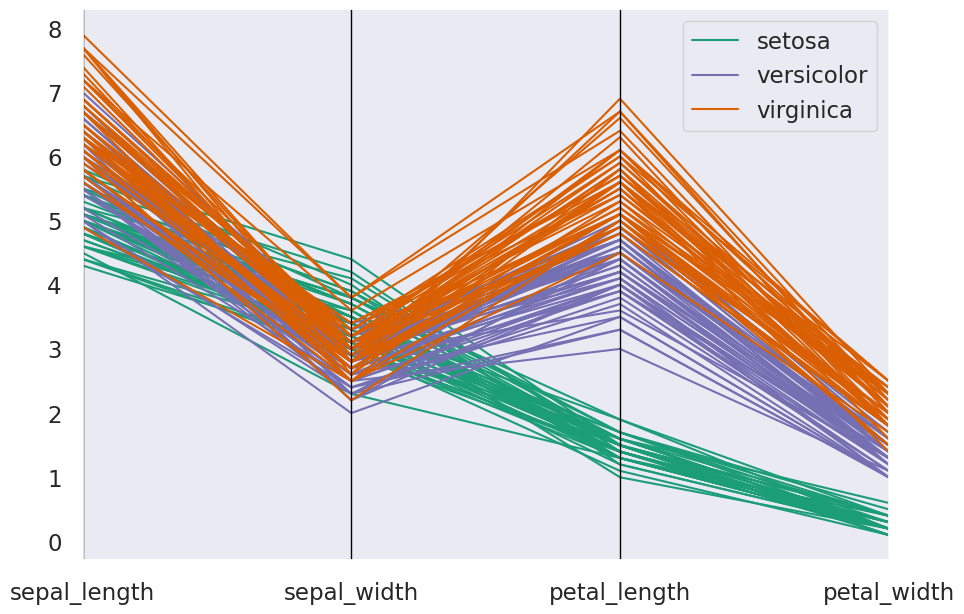

In [13]:
import pandas.plotting as pdplt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')
sns.set(font_scale=1.5)

pdplt.parallel_coordinates(data, 'species', color=('#1b9e77','#d95f02','#7570b3'), sort_labels=True)

<Axes: >

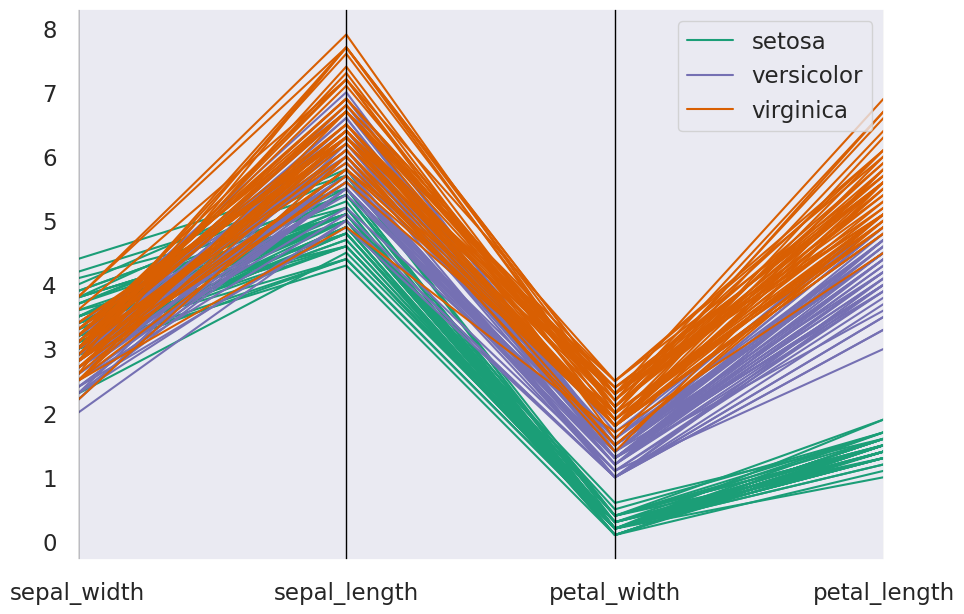

In [14]:
pdplt.parallel_coordinates(data, 'species', 
                     cols=['sepal_width','sepal_length', 'petal_width','petal_length'], 
                     color=('#1b9e77','#d95f02','#7570b3'),sort_labels='True')

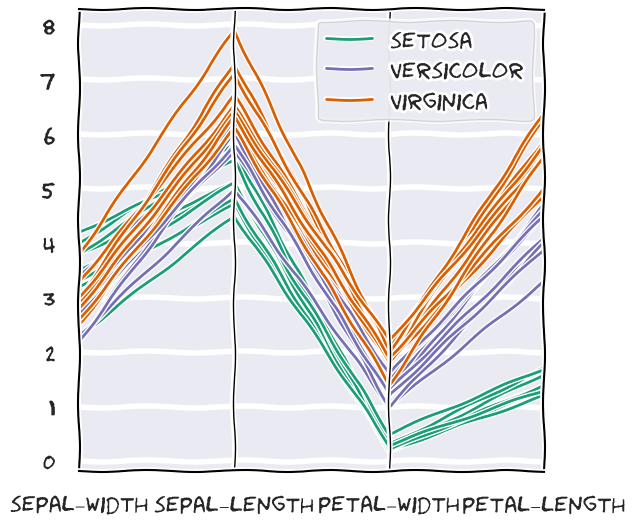

In [37]:
with plt.xkcd():
  pdplt.parallel_coordinates(data.sample(frac=0.2).sort_values('species'), 'species',
                     cols=['sepal_width','sepal_length', 'petal_width','petal_length'], 
                     color=('#1b9e77','#d95f02','#7570b3'), sort_labels=True)

Multivariate analysis using the [radviz()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.plotting.radviz.html?highlight=radviz#pandas.plotting.radviz) function:

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


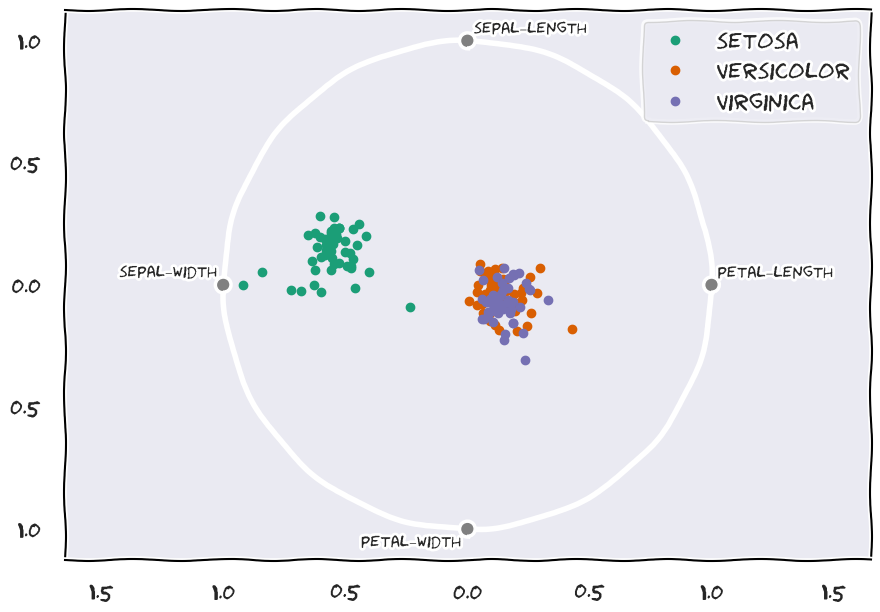

In [16]:
with plt.xkcd():
    #plt.rcParams['font.family'] = ['Humor Sans', 'Comic Sans MS']
    pdplt.radviz(data[['petal_length','sepal_length','sepal_width','petal_width','species']], "species", color=('#1b9e77','#d95f02','#7570b3'))